In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb 
import seaborn as sns
from numpy import linalg as LA
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV 



### Here I created the different percentage of the noise input

In [26]:
# Noise Factor of 15 
# A bigger noise Factor

generated_noise_1 = []


noise_factor_1 = 15
generated_noise_1= noise_factor_1*np.random.rand(691890)
print(generated_noise_1)



[ 1.6252135  12.67328882 12.35646408 ...  1.55753191  0.93660046
 10.6024734 ]


In [27]:
# Noise factor of 5
# A smaller Noise Factor
generated_noise_2 = []

noise_factor_2 = 5
generated_noise_2 = noise_factor_2*np.random.rand(691890)
print(generated_noise_2)

[0.99487976 3.86875243 1.44885873 ... 0.76468671 0.07841884 1.40779276]


In [28]:
df_bottle = pd.read_csv("./bottle.csv ")
df_cast = pd.read_csv("./cast.csv", index_col="Cst_Cnt")

df_bottle.head
df_bottle.columns

C:\Users\najmi\AppData\Local\Temp\ipykernel_336\2169709932.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bottle = pd.read_csv("./bottle.csv ")
C:\Users\najmi\AppData\Local\Temp\ipykernel_336\2169709932.py:2: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cast = pd.read_csv("./cast.csv", index_col="Cst_Cnt")


Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [29]:

def read_data():

    df_bottle = pd.read_csv("./bottle.csv ")
    df_cast = pd.read_csv("./cast.csv", index_col="Cst_Cnt")

    return df_bottle


## EXPLORATORY DATA ANALYSIS

## This part is the Pre-processing section

In [30]:

'''
Here we clean up the data

'''
# Here we change the name of the columns for better data understanding

def clean(df):
    df = df[["T_degC", "Salnty", "Depthm"]]
    df.rename(columns={
        "T_degC":"Temperature",
        "Salnty":"Salinity",
        "Depthm":"Depth"
    }, inplace = True)
    
    return df
    

In [31]:
# Here we remove the none values

def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(method = "ffill")

    for name in df.select_dtypes("category"):
        df[name] = df[name].fillna("None")   

    return df     

In [32]:
# Here we load the data

def load_data():

    # Here we Read the data
    df_bottle = read_data() 

    # Here we preprocess the data
    # Change the name of the columns

    df_bottle = clean(df_bottle)
    
    # Here we remove the null values
    df_bottle = impute(df_bottle)

    return df_bottle

In [49]:
 # Loading the data
 df_bottle = load_data()

C:\Users\najmi\AppData\Local\Temp\ipykernel_336\3398033827.py:3: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bottle = pd.read_csv("./bottle.csv ")
C:\Users\najmi\AppData\Local\Temp\ipykernel_336\3398033827.py:4: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cast = pd.read_csv("./cast.csv", index_col="Cst_Cnt")
C:\Users\najmi\AppData\Local\Temp\ipykernel_336\833158537.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [34]:
df_bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Temperature  864863 non-null  float64
 1   Salinity     864863 non-null  float64
 2   Depth        864863 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 19.8 MB


In [35]:
df_bottle.head()

,Temperature,Salinity,Depth
0,10.50,33.440,0
1,10.46,33.440,8
2,10.46,33.437,10
3,10.45,33.420,19
4,10.45,33.421,20


In [36]:
df_bottle.describe()

,Temperature,Salinity,Depth
count,864863.000000,864863.000000,864863.000000
mean,10.791383,33.836106,226.831951
std,4.259400,0.469311,316.050259
min,1.440000,28.431000,0.000000
25%,7.660000,33.480000,46.000000
50%,10.050000,33.850000,125.000000
75%,13.890000,34.200000,300.000000
max,31.140000,37.034000,5351.000000


In [37]:
# We select our features based on the correlations found here

correlation = df_bottle.corr()
print(correlation)

             Temperature  Salinity     Depth
Temperature     1.000000 -0.451946 -0.673307
Salinity       -0.451946  1.000000  0.512194
Depth          -0.673307  0.512194  1.000000


In [38]:
high_corr_features = correlation.index[abs(correlation['Temperature']) > 0.5]
print(f'Highly Corrolated Features:\n', high_corr_features, '\n')
print(f'No. of Highly Corrolated Features:' , len(high_corr_features))

Highly Corrolated Features:
 Index(['Temperature', 'Depth'], dtype='object') 

No. of Highly Corrolated Features: 2


Text(33.222222222222214, 0.5, 'Features')

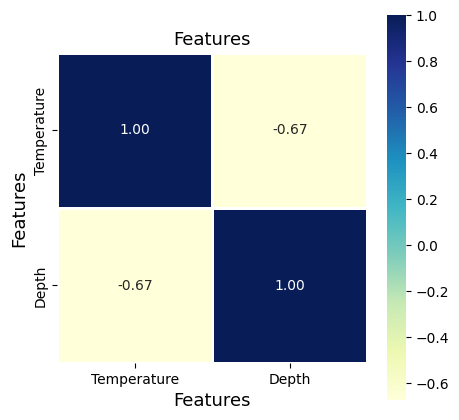

In [39]:
# Drawing the Heat Map of highly correlated features
# Here we create a HeatMap
# This is part of feature selection and correlation identification

plt.figure(figsize=(5,5))
sns.heatmap(df_bottle[high_corr_features].corr(), annot=True, cmap='YlGnBu', cbar=True, fmt='.2f', square=True, linewidths=2)
plt.title('Features', fontsize=13)
plt.xlabel('Features', fontsize=13)
plt.ylabel('Features', fontsize=13)


In [40]:
df_bottle.isnull().sum()

Temperature    0
Salinity       0
Depth          0
dtype: int64

## Here we Measure the conditional number for the df_bottle DataFrame

In [41]:

# This is the condtional Number 
LA.cond(df_bottle)


131.26180458217

In [42]:
df_cast.head()

,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,Date,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
Cst_Cnt,,,,,,,,,,,,,,,,,,,,,
1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,03/01/1949,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,03/01/1949,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,03/02/1949,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,03/02/1949,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,03/02/1949,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [140]:
# LA.cond(df_cast)

In [43]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34404 entries, 1 to 34404
Data columns (total 60 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cruise_ID    34404 non-null  object 
 1   Cruise       34404 non-null  int64  
 2   Cruz_Sta     34404 non-null  int64  
 3   DbSta_ID     34404 non-null  int64  
 4   Cast_ID      34404 non-null  object 
 5   Sta_ID       34404 non-null  object 
 6   Quarter      34404 non-null  int64  
 7   Sta_Code     34404 non-null  object 
 8   Distance     19714 non-null  float64
 9   Date         34404 non-null  object 
 10  Year         34404 non-null  int64  
 11  Month        34404 non-null  int64  
 12  Julian_Date  34404 non-null  int64  
 13  Julian_Day   34404 non-null  int64  
 14  Time         34080 non-null  object 
 15  Lat_Dec      34404 non-null  float64
 16  Lat_Deg      34404 non-null  int64  
 17  Lat_Min      34404 non-null  float64
 18  Lat_Hem      34404 non-null  object 
 19  Lon_

In [44]:
df_cast.describe()

,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,Lat_Dec,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,34404.000000,3.440400e+04,3.440400e+04,34404.000000,19714.000000,34404.00000,34404.000000,34404.000000,34404.000000,34404.000000,...,11634.000000,32928.000000,32725.000000,19063.000000,19071.000000,18989.000000,26807.000000,9920.000000,11882.000000,9507.000000
mean,197406.030781,1.974061e+13,9.330342e+06,2.366556,-116.135017,1974.00218,5.835397,27017.612313,161.366236,31.791633,...,6.440863,27.067602,11.135951,1016.243702,16.261989,14.414635,1.324729,5.636895,4.995624,6.803092
std,1974.562207,1.974557e+11,2.217993e+06,1.091894,117.282768,19.74668,3.326775,6900.075983,100.761217,3.655921,...,2.295422,9.456406,6.823464,8.818816,2.728030,2.630224,1.162603,2.173354,3.106067,1.534078
min,194903.000000,1.949030e+13,1.016800e+05,1.000000,-1920.150000,1949.00000,1.000000,17957.000000,2.000000,18.416666,...,0.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,195701.000000,1.957011e+13,8.100430e+06,1.000000,-169.801500,1957.00000,3.000000,20832.750000,75.000000,29.750000,...,5.000000,26.000000,6.000000,1013.700000,14.400000,12.600000,1.000000,6.000000,2.000000,6.000000
50%,196912.000000,1.969121e+13,9.000800e+06,2.000000,-83.570000,1969.00000,6.000000,25532.000000,157.000000,32.405000,...,6.000000,31.000000,10.000000,1016.300000,16.100000,14.200000,1.000000,6.000000,6.000000,7.000000
75%,198809.000000,1.988091e+13,1.067032e+07,3.000000,-29.470000,1988.00000,9.000000,32400.000000,247.000000,33.823333,...,8.000000,33.000000,15.000000,1019.100000,17.900000,16.000000,2.000000,7.000000,8.000000,8.000000
max,201611.000000,2.016111e+13,1.767030e+07,4.000000,-0.141000,2016.00000,12.000000,41116.000000,354.000000,47.916666,...,50.000000,37.000000,71.000000,1112.600000,43.100000,58.000000,9.000000,9.000000,9.000000,9.000000


In [45]:
df_cast.isnull().sum()

Cruise_ID          0
Cruise             0
Cruz_Sta           0
DbSta_ID           0
Cast_ID            0
Sta_ID             0
Quarter            0
Sta_Code           0
Distance       14690
Date               0
Year               0
Month              0
Julian_Date        0
Julian_Day         0
Time             324
Lat_Dec            0
Lat_Deg            0
Lat_Min            0
Lat_Hem            0
Lon_Dec            0
Lon_Deg            0
Lon_Min            0
Lon_Hem            0
Rpt_Line           0
St_Line            0
Ac_Line            0
Rpt_Sta            0
St_Station         0
Ac_Sta             0
Bottom_D        2281
Secchi         29141
ForelU         32327
Ship_Name       1690
Ship_Code          0
Data_Type          0
Order_Occ      24450
Event_Num          3
Cruz_Leg       32940
Orig_Sta_ID        0
Data_Or        16129
Cruz_Num           0
IntChl         22201
IntC14         32275
Inc_Str        32271
Inc_End        32271
PST_LAN        32287
Civil_T        32288
TimeZone     

In [46]:

# We split the train and test function here
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.35, shuffle=True)

# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_bottle[['Salinity', "Depth"]].values, df_bottle[["Temperature"]].values, test_size=0.2, random_state=34)
del df_bottle

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((691890, 2), (172973, 2), (691890, 1), (172973, 1))

## Exploratory Data Analysis

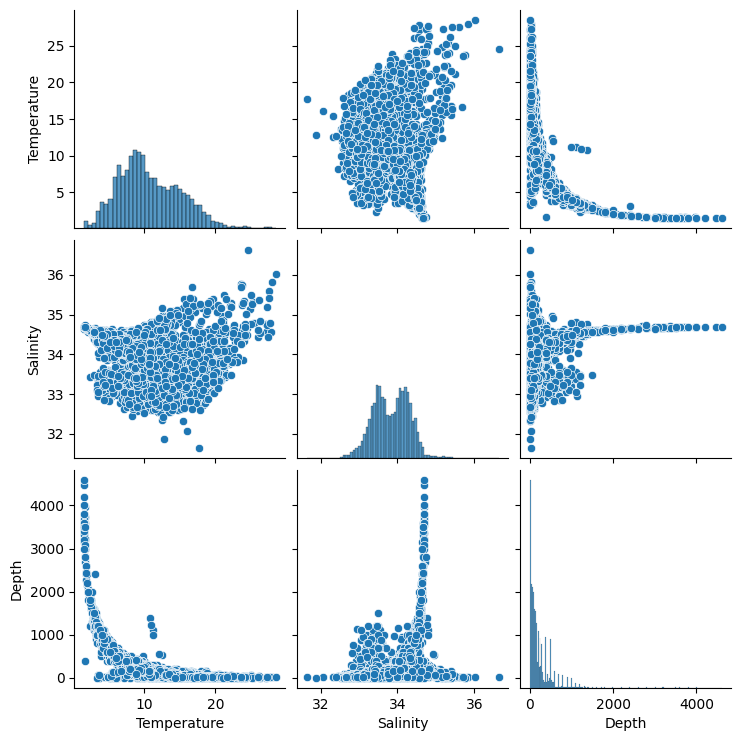

In [50]:
# Looking at graphical reprentation of the df_bottle dataFrame

sns.pairplot(data=df_bottle.sample(10000))

### Looking at the graphical Representation of temperature and salinity of the water

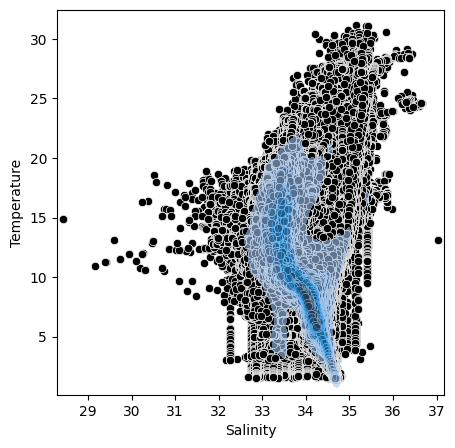

In [51]:

fig, ax= plt.subplots(figsize=(5,5))
sns.scatterplot(data=df_bottle, x="Salinity", y="Temperature", color="k", ax=ax)
sns.kdeplot(data=df_bottle, x="Salinity", y="Temperature", levels=8, fill=True, alpha=0.6, cut=3, ax=ax)

plt.show()


## The Relationship between depth and temperature

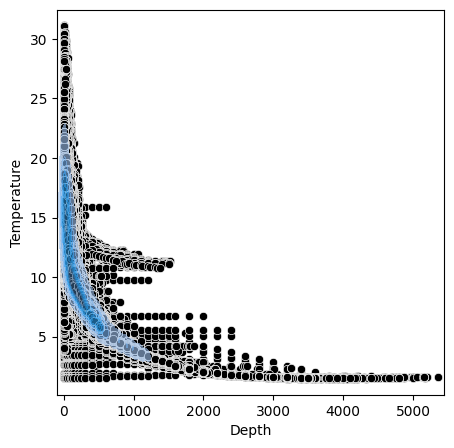

In [52]:

fig, ax= plt.subplots(figsize=(5,5))
sns.scatterplot(data=df_bottle, x="Depth", y="Temperature", color="k", ax=ax)
sns.kdeplot(data=df_bottle, x="Depth", y="Temperature", levels=8, fill=True, alpha=0.6, cut=3, ax=ax)

plt.show()

## Here we build the Linear Regression Model

In [53]:
# Linear Regression
regression = LinearRegression()
regression.fit(X_train, y_train)
y_prediction = regression.predict(X_test)

#### Here we convert the result into dataFrame so that we can visually show the regression line and prediction

In [54]:
# Converting the result into dataFrame

result_df = pd.DataFrame(X_test, columns=["Salinity", "Depth"])
result_df["Temperature"] = y_test
result_df["Temp_pred_linear"] = y_prediction

result_df.head()

,Salinity,Depth,Temperature,Temp_pred_linear
0,34.1580,400.0,6.340,8.967452
1,33.5312,0.0,16.125,13.020523
2,33.7410,87.0,10.460,12.041643
3,33.5700,74.0,13.470,12.372926
4,33.3570,30.0,14.960,13.009608


<AxesSubplot: xlabel='Salinity', ylabel='Temperature'>

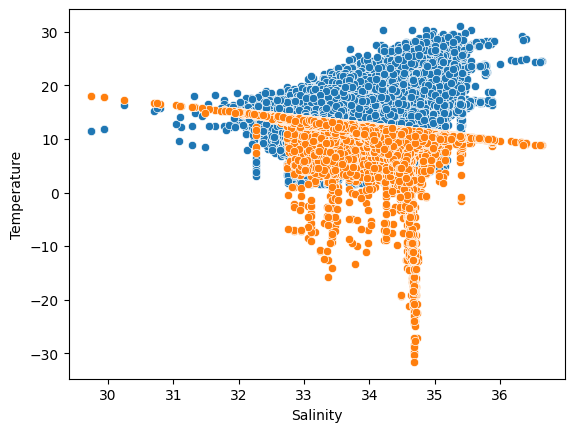

In [55]:
# The relationsip between salinity and temperature

sns.scatterplot(data=result_df, x="Salinity", y="Temperature")
sns.scatterplot(data=result_df, x="Salinity", y="Temp_pred_linear")

### Here I added the noise to the bottle_df dataFrame

In [58]:

import numpy as np
import pandas as pd

print(X_train.shape)
print(X_train)
print(y_train.shape)
result = X_train.flatten()
print(result)


#np.multiply(y_train, generated_noise_1)


(691890, 2)
[[ 34.231 400.   ]
 [ 33.776 200.   ]
 [ 33.921 300.   ]
 ...
 [ 34.239 400.   ]
 [ 33.344  30.   ]
 [ 33.33  103.   ]]
(691890, 1)
[ 34.231 400.     33.776 ...  30.     33.33  103.   ]
